In [1]:
import sys

sys.path.append("../../")
import pandas as pd
import datetime
import os
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)

plt.style.use("classic")
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.formatter.limits"] = [-1000000000, 1000000000]

In [2]:
base_data_path = "../../phitech-data/"
os.listdir(f"{base_data_path}/01_raw")

['#1 6BH25-CME [CBV][M]  1 Min _GraphData.txt',
 '6BH25-CME.txt',
 '#1 6BH25-CME [CBV][M]  60 Min _GraphData.txt']

In [3]:
res = pd.read_csv(
    f"{base_data_path}/01_raw/#1 6BH25-CME [CBV][M]  1 Min _GraphData.txt"
)
res.columns = [
    "date",
    "time",
    "open",
    "high",
    "low",
    "close",
    "volume",
    "n_trades",
    "ohlc avg",
    "hlc avg",
    "hl avg",
    "bid volume",
    "ask volume",
    "top band",
    "middle band",
    "volume.1",
    "top band.1",
    "bottom band",
    "delta",
    "cumulative delta",
    "top band.2",
    "middle band.1",
    "tr",
]
res.head(5).T

,0,1,2,3,4
date,2023-12-14,2023-12-14,2023-12-14,2023-12-14,2023-12-14
time,21:00:00.000000,21:01:00.000000,21:02:00.000000,21:03:00.000000,21:07:00.000000
open,1.2791,1.279,1.2788,1.2786,1.2785
high,1.2791,1.279,1.2788,1.2786,1.2785
low,1.2791,1.2789,1.2788,1.2785,1.2785
close,1.2791,1.2789,1.2788,1.2785,1.2785
volume,5,4,8,4,10
n_trades,3,2,8,3,7
ohlc avg,1.2791,1.2789,1.2788,1.2786,1.2785
hlc avg,1.2791,1.2789,1.2788,1.2785,1.2785


<Axes: title={'center': 'Close Price'}>

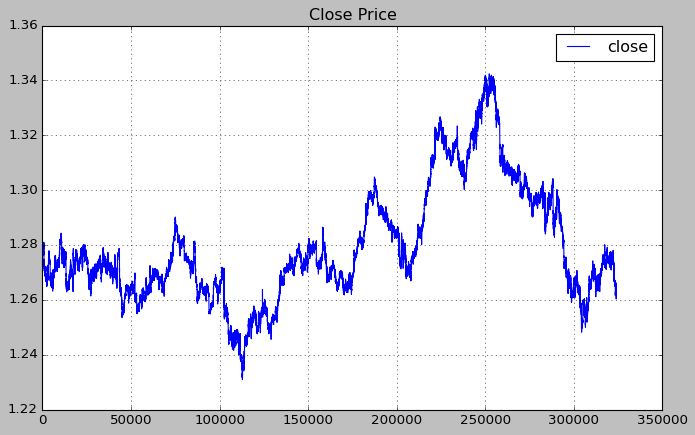

In [4]:
res.close.plot(title="Close Price", legend=True)

accuracy score -> 0.6826046023490192


<Axes: title={'center': 'Feature Importance'}, xlabel='feature'>

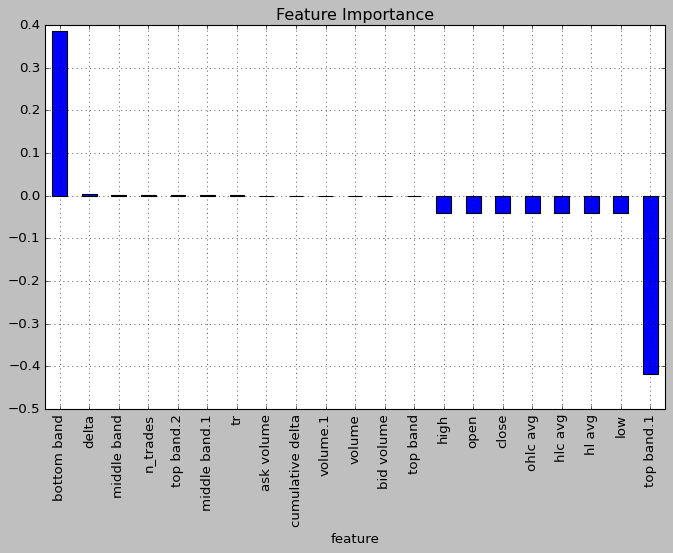

In [5]:
# train a very simple logistic regression model to predict whether the next close price will be UP or DOWN using the remaining features

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

res["close_diff"] = res["close"].diff()
res["close_diff"] = res["close_diff"].shift(-10)
res["target"] = np.where(res["close_diff"] > 0, 1, 0)
res = res.dropna()

X = res[
    [
        "open",
        "high",
        "low",
        "close",
        "volume",
        "n_trades",
        "ohlc avg",
        "hlc avg",
        "hl avg",
        "bid volume",
        "ask volume",
        "top band",
        "middle band",
        "volume.1",
        "top band.1",
        "bottom band",
        "delta",
        "cumulative delta",
        "top band.2",
        "middle band.1",
        "tr",
    ]
]
y = res["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)

print(f"accuracy score -> {accuracy_score}")

# plot feature importance with the right names for features sorted by importance
importance = model.coef_[0]
feature_names = X.columns

feature_importance = pd.DataFrame({"feature": feature_names, "importance": importance})

feature_importance = feature_importance.sort_values("importance", ascending=False)
feature_importance.plot(
    kind="bar", x="feature", y="importance", title="Feature Importance", legend=False
)